In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os

In [238]:
print(sklearn.__version__)

1.4.2


In [2]:
!pip install pydantic==2.7.4

In [3]:
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./wine-reviews-0-3.ipynb
./withyear_boxcox.csv
./wine-reviews-0-2.ipynb
./wine_data_with_year_lemmatized.csv


In [4]:
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import re
import string
import spacy
import numpy as np
from sklearn.base import TransformerMixin

In [5]:
from category_encoders.target_encoder import TargetEncoder
from category_encoders import HashingEncoder, LeaveOneOutEncoder

In [6]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

In [76]:
file_path = "./withyear_boxcox.csv"  # Update with your file path
wine_data = pd.read_csv(file_path)

In [77]:
wine_data.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,designation_length,log_price,box_cox_price,year
0,Italy,"aromas include tropical fruit, broom, brimston...",vulkà bianco,87,25.0,sicily & sardinia,etna,kerin o’keefe,Nicosia Vulkà Bianco,white blend,nicosia,12,3.258097,2.035723,2013
1,Portugal,"this is ripe and fruity, a wine that is smooth...",avidagos,87,15.0,douro,unknown,roger voss,Quinta dos Avidagos Avidagos Red,portuguese red,quinta dos avidagos,8,2.772589,1.831847,2011
2,US,"tart and snappy, the flavors of lime flesh and...",unknown,87,14.0,oregon,willamette valley,paul gregutt,Rainstorm Pinot Gris,pinot gris,rainstorm,7,2.708050,1.801750,2013
3,US,"pineapple rind, lemon pith and orange blossom ...",reserve late harvest,87,13.0,michigan,lake michigan shore,alexander peartree,St. Julian Reserve Late Harvest Riesling,riesling,st. julian,20,2.639057,1.768696,2013
4,US,"much like the regular bottling from 2012, this...",vintner's reserve wild child block,87,65.0,oregon,willamette valley,paul gregutt,Sweet Cheeks Vintner's Reserve Wild Child Bloc...,pinot noir,sweet cheeks,34,4.189655,2.340275,2012


In [78]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119928 entries, 0 to 119927
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   country             119928 non-null  object 
 1   description         119928 non-null  object 
 2   designation         119928 non-null  object 
 3   points              119928 non-null  int64  
 4   price               119928 non-null  float64
 5   province            119928 non-null  object 
 6   region_1            119928 non-null  object 
 7   taster_name         119928 non-null  object 
 8   title               119928 non-null  object 
 9   variety             119928 non-null  object 
 10  winery              119928 non-null  object 
 11  designation_length  119928 non-null  int64  
 12  log_price           119928 non-null  float64
 13  box_cox_price       119928 non-null  float64
 14  year                119928 non-null  object 
dtypes: float64(3), int64(2), object(10

In [79]:
# Check for missing values
wine_data.isnull().sum()

country               0
description           0
designation           0
points                0
price                 0
province              0
region_1              0
taster_name           0
title                 0
variety               0
winery                0
designation_length    0
log_price             0
box_cox_price         0
year                  0
dtype: int64

In [80]:
# wine_data_cleaned = wine_data.drop(columns=['title'])
wine_data_cleaned = wine_data.copy()

In [81]:
categorical_features = ['country', 'province', 'region_1', 'taster_name', 'variety', 'winery', 'year']
numerical_features = ['box_cox_price'] # price
text_features = 'description'

In [82]:
for col in categorical_features:
    wine_data_cleaned[col] = wine_data_cleaned[col].astype(str).str.lower()

In [83]:
wine_data_cleaned.isnull().sum()

country               0
description           0
designation           0
points                0
price                 0
province              0
region_1              0
taster_name           0
title                 0
variety               0
winery                0
designation_length    0
log_price             0
box_cox_price         0
year                  0
dtype: int64

In [84]:
# wine_data_cleaned['description'] = wine_data_cleaned['description'].apply(lambda x: x.lower())
wine_data_cleaned['description'] = wine_data_cleaned['description'].str.replace('[^\w\s]', '')
wine_data_cleaned['description'] = wine_data_cleaned['description'].str.replace('[0-9]+', '')
# wine_data_cleaned['description'] = wine_data_cleaned['description'].apply(lambda x: ' '.join(w for w in x.split() if w not in stopwords.words('english')))

In [86]:
# Apply lemmatization to the dataset
# wine_data_cleaned['description'] = wine_data_cleaned['description'].apply(lambda x: " ".join([token.lemma_ for token in nlp(x)]))
wine_data_cleaned['description'] = wine_data_cleaned['description'].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if not token.is_stop]))

In [ ]:
wine_data_cleaned['description'] = wine_data_cleaned['description'].apply(lambda x: " ".join([token.lemma_ for token in nlp(x)]))

In [88]:
wine_data_cleaned

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,designation_length,log_price,box_cox_price,year
0,italy,"aroma include tropical fruit , broom , brimsto...",vulkà bianco,87,25.0,sicily & sardinia,etna,kerin o’keefe,Nicosia Vulkà Bianco,white blend,nicosia,12,3.258097,2.035723,2013
1,portugal,"ripe fruity , wine smooth structure . firm tan...",avidagos,87,15.0,douro,unknown,roger voss,Quinta dos Avidagos Avidagos Red,portuguese red,quinta dos avidagos,8,2.772589,1.831847,2011
2,us,"tart snappy , flavor lime flesh rind dominate ...",unknown,87,14.0,oregon,willamette valley,paul gregutt,Rainstorm Pinot Gris,pinot gris,rainstorm,7,2.708050,1.801750,2013
3,us,"pineapple rind , lemon pith orange blossom sta...",reserve late harvest,87,13.0,michigan,lake michigan shore,alexander peartree,St. Julian Reserve Late Harvest Riesling,riesling,st. julian,20,2.639057,1.768696,2013
4,us,"like regular bottling 2012 , come rough tannic...",vintner's reserve wild child block,87,65.0,oregon,willamette valley,paul gregutt,Sweet Cheeks Vintner's Reserve Wild Child Bloc...,pinot noir,sweet cheeks,34,4.189655,2.340275,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119923,germany,note honeysuckle cantaloupe sweeten deliciousl...,brauneberger juffer-sonnenuhr spätlese,90,28.0,mosel,unknown,anna lee c. iijima,Dr. H. Thanisch Brauneberger Juffer-Sonnenuhr ...,riesling,dr. h. thanisch (erben müller-burggraef),38,3.367296,2.076738,2013
119924,us,citation give decade bottle age prior release ...,unknown,90,75.0,oregon,oregon,paul gregutt,Citation Pinot Noir,pinot noir,citation,7,4.330733,2.378600,2004
119925,france,- drain gravel soil give wine crisp dry charac...,kritt,90,30.0,alsace,alsace,roger voss,Domaine Gresser Kritt Gewurztraminer,gewürztraminer,domaine gresser,5,3.433987,2.101011,2013
119926,france,"dry style pinot gris , crisp acidity . weight ...",unknown,90,32.0,alsace,alsace,roger voss,Domaine Marcel Deiss Pinot Gris,pinot gris,domaine marcel deiss,7,3.496508,2.123250,2012


In [253]:
wine_data_test = wine_data_cleaned.copy()

In [255]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Apply one-hot encoding to categorical features
encoder = ce.CountEncoder()  # Avoid dummy variable trap
encoded_cat = encoder.fit_transform(wine_data_test[categorical_features])

# Convert to DataFrame
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names())

# Concatenate numerical features
full_data = pd.concat([wine_data_test[numerical_features], encoded_cat_df], axis=1)

# Compute VIF on full dataset
vif_data_cat = pd.DataFrame()
vif_data_cat["Feature"] = full_data.columns
vif_data_cat["VIF"] = [variance_inflation_factor(full_data.values, i) for i in range(full_data.shape[1])]  # Variance Inflation Factor
vif_data_cat

,Feature,VIF
0,box_cox_price,17.990500
1,country,9.533636
2,province,4.143131
3,region_1,1.830349
4,taster_name,4.175343
5,variety,2.758583
6,winery,1.886527
7,year,7.331947


In [264]:
correlated_features = full_data.corr()['box_cox_price'].abs().sort_values(ascending=False)
print(correlated_features)

box_cox_price    1.000000
country          0.215403
variety          0.212702
province         0.197320
region_1         0.168513
year             0.048768
winery           0.046617
taster_name      0.017418
Name: box_cox_price, dtype: float64


In [89]:
wine_data_cleaned.to_csv('wine_data_with_year_lemmatized_boxcox.csv', index=False)

In [90]:
def optimal_n_components(categorical_features, data, factor=10):
    unique_counts = [data[col].nunique() for col in categorical_features]
    avg_unique = np.mean(unique_counts)
    return int(np.ceil(np.log2(avg_unique) * factor))

In [91]:
# Compute n_components
n_components_opt = optimal_n_components(categorical_features, wine_data_cleaned)
n_components_opt

115

In [92]:
# Prepare data
X_points = wine_data_cleaned[
categorical_features + 
numerical_features + 
[text_features]
]
y_points = wine_data_cleaned['points']

In [245]:
X_points

,country,province,region_1,taster_name,variety,winery,year,box_cox_price,description
0,italy,sicily & sardinia,etna,kerin o’keefe,white blend,nicosia,2013,2.035723,"aroma include tropical fruit , broom , brimsto..."
1,portugal,douro,unknown,roger voss,portuguese red,quinta dos avidagos,2011,1.831847,"ripe fruity , wine smooth structure . firm tan..."
2,us,oregon,willamette valley,paul gregutt,pinot gris,rainstorm,2013,1.801750,"tart snappy , flavor lime flesh rind dominate ..."
3,us,michigan,lake michigan shore,alexander peartree,riesling,st. julian,2013,1.768696,"pineapple rind , lemon pith orange blossom sta..."
4,us,oregon,willamette valley,paul gregutt,pinot noir,sweet cheeks,2012,2.340275,"like regular bottling 2012 , come rough tannic..."
...,...,...,...,...,...,...,...,...,...
119923,germany,mosel,unknown,anna lee c. iijima,riesling,dr. h. thanisch (erben müller-burggraef),2013,2.076738,note honeysuckle cantaloupe sweeten deliciousl...
119924,us,oregon,oregon,paul gregutt,pinot noir,citation,2004,2.378600,citation give decade bottle age prior release ...
119925,france,alsace,alsace,roger voss,gewürztraminer,domaine gresser,2013,2.101011,- drain gravel soil give wine crisp dry charac...
119926,france,alsace,alsace,roger voss,pinot gris,domaine marcel deiss,2012,2.123250,"dry style pinot gris , crisp acidity . weight ..."


In [93]:
# Train-test split
X_train_points, X_test_points, y_train_points, y_test_points = train_test_split(
    X_points, y_points, test_size=0.2, random_state=42
)

In [94]:
from lightgbm import LGBMRegressor

In [228]:
# regressor_ = LGBMRegressor(objective ='tweedie', n_estimators=100, random_state=42)
regressor_ = xgb.XGBRegressor(n_estimators=1000, random_state=42)
# regressor_ = RandomForestRegressor(n_estimators=100, random_state=42)  # too long
# regressor_ = Ridge(alpha=1.0)
# regressor_ = Lasso(alpha=0.01)
# regressor_ = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', max_iter=500)
# regressor_ = AdaBoostRegressor(random_state=0, n_estimators=100)

In [229]:
# Define the pipeline
pipeline_points = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        remainder='passthrough',
        transformers=[
            # ('num', StandardScaler(), numerical_features),  # StandardScaler(),
            ('cat', ce.CountEncoder(), categorical_features),
            ('text_1', TfidfVectorizer(max_features=5000), text_features)
            # ('text_1', Pipeline([
            #     ('text_prep', TextPreprocessor()),  # Preprocess text
            #     ('tfidf', TfidfVectorizer(max_features=5000))  # Extract features
            #     # ('vect', CountVectorizer(max_features=500)),  # Bag-of-words
            #     # ('lda', LatentDirichletAllocation(n_components=10, random_state=42))  # Extract 10 topics
            # ]), text_features)
        ]
    )),
    ('regressor', regressor_)
])

# Model fit

In [230]:
# Train the pipeline
pipeline_points.fit(X_train_points, y_train_points)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  CountEncoder(combine_min_nan_groups=True),
                                                  ['country', 'province',
                                                   'region_1', 'taster_name',
                                                   'variety', 'winery',
                                                   'year']),
                                                 ('text_1',
                                                  TfidfVectorizer(max_features=5000),
                                                  'description')])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [231]:
# Predict on the test set
y_pred_points = pipeline_points.predict(X_test_points)

In [232]:
# Evaluate the model
rmse_points = np.sqrt(mean_squared_error(y_test_points, y_pred_points))
r2_points = r2_score(y_test_points, y_pred_points)
rmse_points, r2_points

(1.5527049731464777, 0.7454827540190188)

light gbm (1.6384527666927595, 0.7165952144790388)

light gbm (1.6378231263235166, 0.7168129916533512)

light gbm (1.642678519593438, 0.7151314640564392)

light gbm (1.6413138593398797, 0.7156045782863222)


xgboost (1.5605451621631177, 0.7429059589781667)

One hot 5k (1.599232263726167, 0.7007806609731844)

count 5k (1.620160978323012, 0.6928978128870619)


Count 500 (1.6794329984085883, 0.6700167178697488)

target 500 (1.8072065000459652, 0.6178955166646973)

TF-IDF/Pure Cat. Data

500 - (1.6722940970599527, 0.6728161284798315)

5000 - (1.6065377344150664, 0.6980406825915523)

5000 - (1.6084865550382144, 0.6973076509884997)


50000 - (1.6032412349400837, 0.6992786086689374)

TF-IDF/No Data

5000 - (1.8526887219369101, 0.5984205421324293)


TF-IDF/No Cat. Data

5000 - (1.7085413478668794, 0.6584788843854525)


TF-IDF/ ['country', 'designation', 'province', 'taster_name', 'variety', 'year']

5000 - (1.61654797205726, 0.6942659793385838)


In [220]:
# Get the trained XGBRegressor from the pipeline
xgb_model = pipeline_points.named_steps['regressor']
# Get feature names from ColumnTransformer
preprocessor = pipeline_points.named_steps['preprocessor']

# Retrieve categorical feature names after one-hot encoding
cat_names = preprocessor.named_transformers_['cat'].get_feature_names()

# Retrieve text feature names from TF-IDF
text_names = [f"tfidf_{i}" for i in range(preprocessor.named_transformers_['text_1'].get_feature_names_out().shape[0])]

# Combine all feature names
feature_names = numerical_features + list(cat_names) + text_names

# Extract feature importances from XGBoost
feature_importance = xgb_model.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [221]:
feature_importance_df.head(20)

,Feature,Importance
5007,tfidf_4999,0.013381
3806,tfidf_3798,0.010414
3778,tfidf_3770,0.010115
4767,tfidf_4759,0.009248
4509,tfidf_4501,0.008977
1471,tfidf_1463,0.008036
2461,tfidf_2453,0.006769
3112,tfidf_3104,0.006485
1797,tfidf_1789,0.005766
509,tfidf_501,0.005729


In [222]:
# Remove TF-IDF features and recalculate feature importance

# Get the trained XGBRegressor from the pipeline
xgb_model = pipeline_points.named_steps['regressor']

# Get feature names from ColumnTransformer
preprocessor = pipeline_points.named_steps['preprocessor']

# Retrieve categorical feature names after one-hot encoding
cat_names = preprocessor.named_transformers_['cat'].get_feature_names()

# Combine only numerical and categorical features (excluding TF-IDF features)
feature_names_no_tfidf = numerical_features + list(cat_names)

# Extract feature importances from XGBoost
feature_importance_no_tfidf = xgb_model.feature_importances_[:len(feature_names_no_tfidf)]

# Create a DataFrame for better readability
feature_importance_df_no_tfidf = pd.DataFrame({'Feature': feature_names_no_tfidf, 'Importance': feature_importance_no_tfidf})
feature_importance_df_no_tfidf = feature_importance_df_no_tfidf.sort_values(by='Importance', ascending=False)

In [223]:
feature_importance_df_no_tfidf

,Feature,Importance
3,region_1,0.001945
5,variety,0.000342
1,country,0.000313
0,box_cox_price,0.000285
6,winery,0.000275
4,taster_name,0.000165
2,province,0.000081
7,year,0.000022


In [224]:
comparison_df = pd.DataFrame({
    'Actual': y_test_points,
    'Predicted': y_pred_points
}).reset_index(drop=True)
comparison_df

,Actual,Predicted
0,88,88.128166
1,85,84.722237
2,84,83.272240
3,92,92.306450
4,89,90.188126
...,...,...
23981,87,86.672890
23982,85,84.468094
23983,92,91.619934
23984,84,83.977425


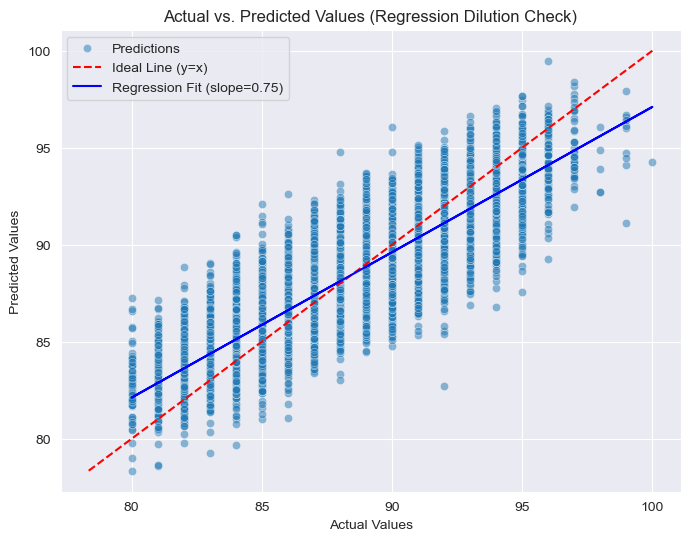

In [225]:
# Create scatter plot of Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=comparison_df['Actual'], y=comparison_df['Predicted'], alpha=0.5, label='Predictions')

# Add identity line (perfect predictions)
min_val, max_val = comparison_df.min().min(), comparison_df.max().max()
plt.plot([min_val, max_val], [min_val, max_val], '--r', label='Ideal Line (y=x)')

# Fit a regression line to observe dilution
X = sm.add_constant(comparison_df['Actual'])  # Add constant for intercept
model = sm.OLS(comparison_df['Predicted'], X).fit()
slope = model.params[1]
intercept = model.params[0]
plt.plot(comparison_df['Actual'], model.predict(X), color='blue', label=f'Regression Fit (slope={slope:.2f})')

# Labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Regression Dilution Check)')
plt.legend()
plt.show()

# SHAP

In [247]:
import shap
from scipy import stats

In [250]:
# Extract transformed features using the model's preprocessor
X_transformed = pipeline_points.named_steps['preprocessor'].transform(X_points)

# Convert sparse matrix to dense (for TF-IDF & categorical features)
if hasattr(X_transformed, "toarray"):
    X_transformed = X_transformed.toarray()

# Extract correct feature names
feature_names = []
for name, transformer, cols in pipeline_points.named_steps['preprocessor'].transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names.extend(transformer.get_feature_names_out())
    else:
        feature_names.extend(cols)

# Convert transformed dataset to DataFrame with correct feature names
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

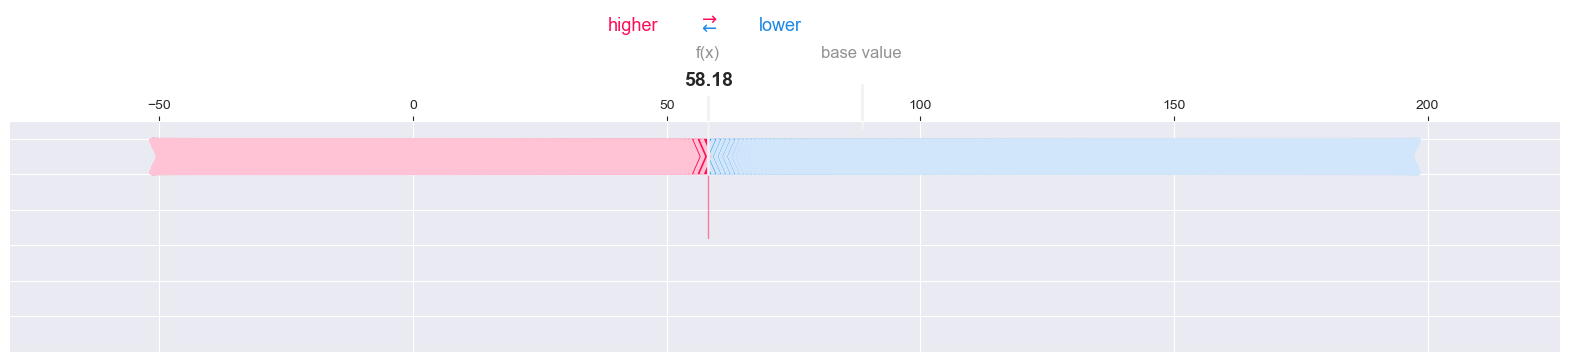

In [252]:
# Load trained model
regressor = pipeline_points.named_steps['regressor']

# Ensure SHAP uses the **exact transformed features**
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_transformed_df.values)

# Visualize SHAP
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_transformed_df.iloc[0], matplotlib=True)


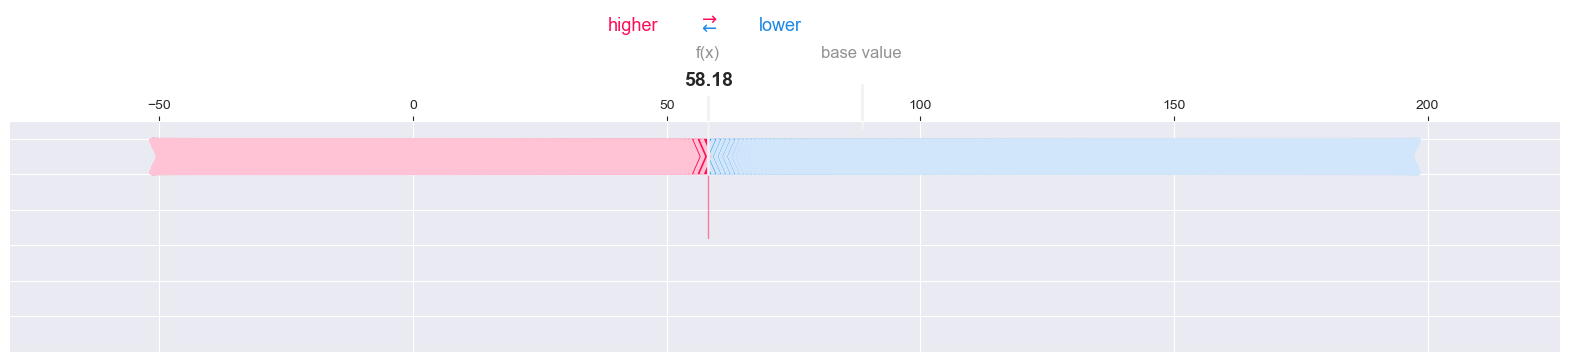

In [246]:
# Ensure pipeline preprocessor is correctly applied
preprocessor = pipeline_points.named_steps['preprocessor']

# Properly extract feature names
feature_names = []
for name, transformer, cols in preprocessor.transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        # Ensure TF-IDF and CountEncoder names are properly extracted
        feature_names.extend(transformer.get_feature_names_out())
    else:
        feature_names.extend(cols)

# Fix "price" column renaming
feature_names = ['price' if name == 8 else name for name in feature_names]

# Apply the exact same transformation used by the pipeline
X_transformed = preprocessor.transform(X_points)

# Convert sparse matrix to dense if necessary
if hasattr(X_transformed, "toarray"):
    X_transformed = X_transformed.toarray()

# Convert transformed data to DataFrame with correct feature names
X_transformed = pd.DataFrame(X_transformed, columns=feature_names)

# Load the trained LightGBM regressor from the pipeline
regressor = pipeline_points.named_steps['regressor']

# Convert X_transformed to numpy array (if needed)
X_transformed_np = X_transformed.values if isinstance(X_transformed, pd.DataFrame) else X_transformed

# Ensure SHAP uses correct LightGBM explainer
explainer = shap.TreeExplainer(regressor)

# Compute SHAP values on transformed input
shap_values = explainer.shap_values(X_transformed_np)

# Initialize SHAP visualization
shap.initjs()

# Corrected SHAP force plot
shap.force_plot(explainer.expected_value, shap_values[0], X_transformed.iloc[0], matplotlib=True)

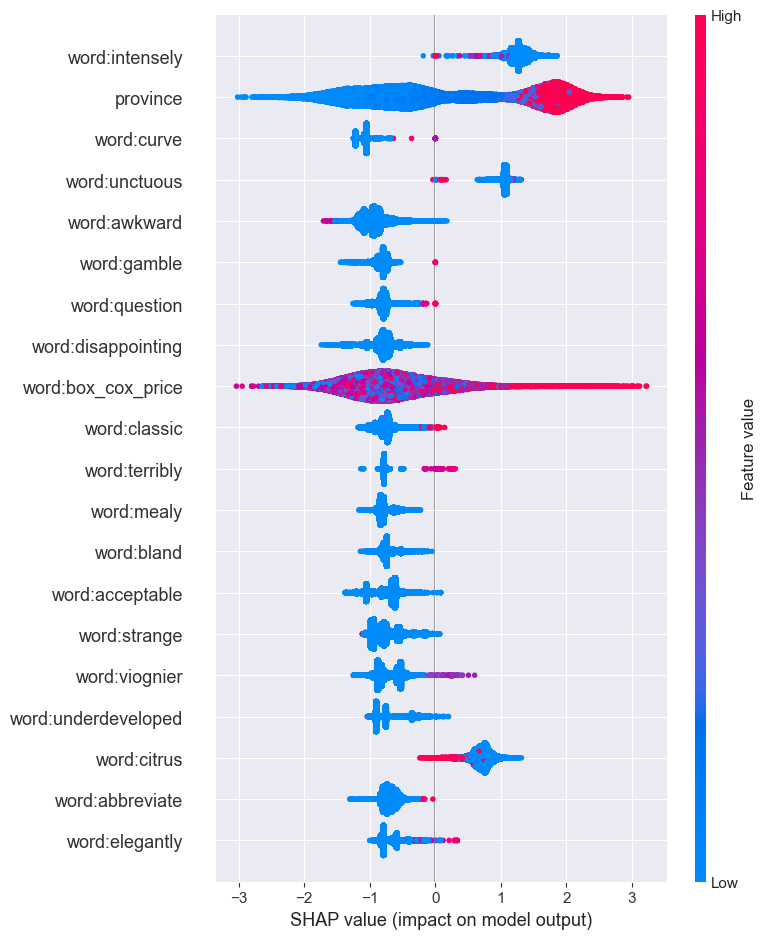

In [243]:
shap.summary_plot(shap_values, X_transformed)

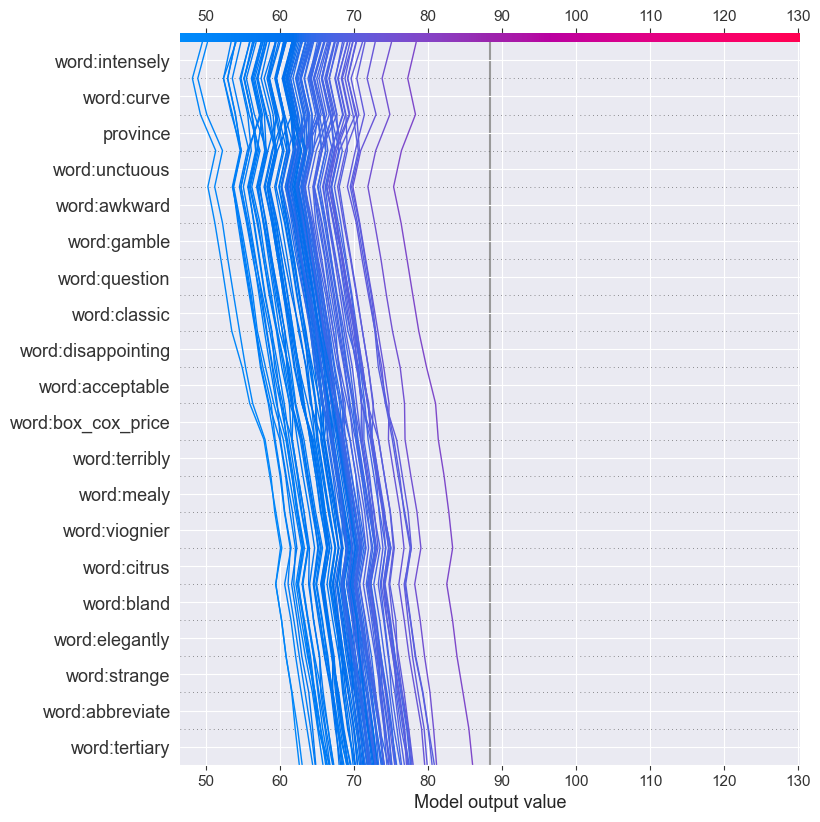

In [244]:
shap.decision_plot(explainer.expected_value, shap_values[:100], X_transformed)

# Model tuning

In [51]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, make_scorer
import xgboost as xgb

In [48]:
# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('cat', ce.CountEncoder(), categorical_features),
        ('text_1', TfidfVectorizer(), text_features)  # Placeholder for tuning max_features
    ]
)

In [49]:
# Define the pipeline
pipeline_points = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor_)
])

In [50]:
# Define parameter grid
param_grid = {
    'preprocessor__text_1__max_features': [500, 1000, 5000, 10000]  # Test different values
}

In [52]:
# Use negative RMSE as the scoring metric
scoring = make_scorer(mean_squared_error, greater_is_better=False)

In [53]:
# Wrap GridSearchCV with tqdm progress bar
class TqdmSearchCV(GridSearchCV):
    def fit(self, X, y=None, **fit_params):
        with tqdm(total=len(self.param_grid['preprocessor__text_1__max_features']) * self.cv) as pbar:
            def callback(result):
                pbar.update(1)
            self._fit_and_score_callback = callback
            return super().fit(X, y, **fit_params)

In [54]:
# Run GridSearchCV with Progress Bar
grid_search = TqdmSearchCV(pipeline_points, param_grid, cv=3, scoring=scoring, n_jobs=-1, verbose=2)
grid_search.fit(X_train_points, y_train_points)

  0%|          | 0/12 [00:00<?, ?it/s]

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/anaconda3/lib/python3.12/site-packages/category_encoders/ordinal.py:306: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
/opt/anaconda3/lib/python3.12/site-packages/category_encoders/ordinal.py:306: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 3.082800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372706
[LightGBM] [Info] Number of data points in the train set: 95942, number of used features: 5008
[LightGBM] [Info] Start training from score 88.444706


  0%|          | 0/12 [05:11<?, ?it/s]


TqdmSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         CountEncoder(combine_min_nan_groups=True),
                                                                         ['country',
                                                                          'province',
                                                                          'region_1',
                                                                          'taster_name',
                                                                          'variety',
                                                                          'winery',
                                                                          'year']),
                                                                        ('text_1',
                                                                         TfidfVectorizer(),
                                                                         'description')])),
                                       ('regressor',
                                        LGBMRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'preprocessor__text_1__max_features': [500, 1000, 5000,
                                                                10000]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=2)

In [55]:
# Get the best max_features value
best_max_features = grid_search.best_params_['preprocessor__text_1__max_features']
best_score = -grid_search.best_score_  # Convert negative RMSE back to RMSE

In [56]:
print(f"Optimal max_features: {best_max_features}")
print(f"Best RMSE: {best_score}")

Optimal max_features: 5000
Best RMSE: 2.6518690394564888


In [47]:
# Define hyperparameter grid
param_dist = {
    "regressor__n_estimators": [100, 300, 500],
    "regressor__max_depth": [3, 6, 9],
    "regressor__learning_rate": [0.01, 0.05, 0.1, 0.2],
    # "regressor__subsample": [0.6, 0.8, 1.0],
    "regressor__colsample_bytree": [0.6, 1.0]
}

In [48]:
# Perform randomized search
random_search = GridSearchCV(
    pipeline_points,
    param_dist,
    # n_iter=3,  # Number of different combinations to try
    scoring='r2',
    cv=5,
    verbose=10,
    n_jobs=-1,
    return_train_score = True
    # random_state=42
)

In [ ]:
# Fit the model with best parameters
random_search.fit(X_train_points, y_train_points)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.12/site-packages/category_encoders/ordinal.py:306: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
/opt/anaconda3/lib/python3.12/site-packages/category_encoders/ordinal.py:306: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [40]:
# Print best hyperparameters
print(f"Best Parameters: {random_search.best_params_}")

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test_points)
rmse_best = np.sqrt(mean_squared_error(y_test_points, y_pred_best))
r2_best = r2_score(y_test_points, y_pred_best)

print(f"Best RMSE: {rmse_best}, best R2 score: {r2_best}")


Best Parameters: {'regressor__colsample_bytree': 0.6, 'regressor__n_estimators': 300}
Best RMSE: 1.5414951342848395, best R2 score: 0.721996099079815


In [41]:
train_score = best_model.score(X_train_points, y_train_points)
test_score = best_model.score(X_test_points, y_test_points)

print(f"Train R²: {train_score}")
print(f"Test R²: {test_score}")

if train_score - test_score > 0.1:
    print("Model might be overfitting! Consider reducing max_depth or increasing regularization.")

Train R²: 0.8366822087726247
Test R²: 0.721996099079815
Model might be overfitting! Consider reducing max_depth or increasing regularization.


In [42]:
comparison_df = pd.DataFrame({
    'Actual': y_test_points, 
    'Predicted': y_pred_best
}).reset_index(drop=True)

In [43]:
comparison_df

,Actual,Predicted
0,93,93.290398
1,86,87.064262
2,89,88.292366
3,88,88.052475
4,90,88.704872
...,...,...
22269,85,84.477997
22270,88,88.022881
22271,92,91.212402
22272,88,86.379768


# Model Export

In [144]:
from joblib import dump

In [227]:
pipeline_name = 'wine_points_XGBoostRegressor_v2.joblib'
dump(pipeline_points, pipeline_name)

['wine_points_XGBoostRegressor_v2.joblib']

In [ ]:
from joblib import load
# Load the saved model
loaded_model = load(f'/kaggle/working/{pipeline_name}')

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test_points)

rmse_points_from_loaded = np.sqrt(mean_squared_error(y_test_points, predictions))
r2_points_from_loaded = r2_score(y_test_points, predictions)

rmse_points_from_loaded, r2_points_from_loaded

# Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

In [69]:
# Use points as-is for classification
y_points_class = y_points-80  # Keep the 80-100 range

In [70]:
# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_points, y_points_class, test_size=0.2, random_state=42
)

In [71]:
# Define the pipeline
pipeline_class = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        remainder='passthrough',
        transformers=[
            ('cat', ce.CountEncoder(), categorical_features),
            ('text_1', TfidfVectorizer(max_features=5000), text_features)
        ]
    )),
    ('classifier', XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
))
])

In [72]:
# Train the classification pipeline
pipeline_class.fit(X_train_class, y_train_class)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  CountEncoder(combine_min_nan_groups=True),
                                                  ['country', 'province',
                                                   'region_1', 'taster_name',
                                                   'variety', 'winery',
                                                   'year']),
                                                 ('text_1',
                                                  TfidfVectorizer(max_features=5000),
                                                  'description')])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               col...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [73]:
# Predict and evaluate
y_pred_class = pipeline_class.predict(X_test_class)

In [74]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.38      0.12      0.18        67
           1       0.21      0.03      0.06       143
           2       0.42      0.18      0.25       363
           3       0.19      0.07      0.10       549
           4       0.32      0.20      0.25      1286
           5       0.28      0.21      0.24      1833
           6       0.26      0.20      0.22      2266
           7       0.25      0.36      0.29      3131
           8       0.22      0.32      0.26      3057
           9       0.25      0.10      0.14      2279
          10       0.24      0.34      0.28      2724
          11       0.22      0.21      0.21      2091
          12       0.22      0.26      0.24      1803
          13       0.25      0.26      0.26      1197
          14       0.26      0.18      0.21       703
          15       0.32      0.11      0.17       324
          16       0.07      0.01      0.02       115
          17       0.57    

<Axes: >

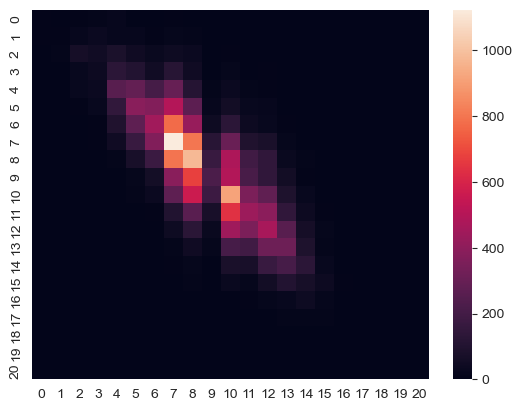

In [75]:
sn.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=False)

<Axes: >

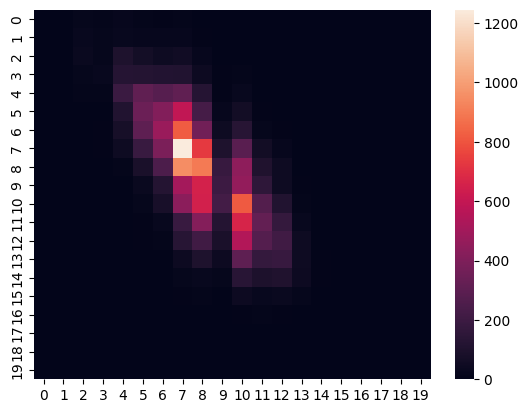

In [24]:
sn.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=False)